Check if neff is the main thing driving the fact that our method improves over Blazek et al more for LSST than for SDSs

In [46]:
neff_a_SDSS = 0.269
neff_b_SDSS = 0.470

neff_a_LSST = 2.71
neff_b_LSST = 13.4

neff_us_SDSS = 0.114
neff_us_LSST = 1.72

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
Ratio_of_interest = (np.sqrt(neff_us_LSST) / np.sqrt(neff_a_LSST + neff_b_LSST)) * (np.sqrt(neff_a_SDSS + neff_b_SDSS) / np.sqrt(neff_us_SDSS))

In [33]:
print "ratio=", Ratio_of_interest

ratio= 0.831928967917


Now check if the averaged SigmaC that goes into the shape noise is having a significant effect

In [34]:
SigA_SDSS = 9051.
SigB_SDSS = 4639.
SigA_LSST = 11798.
SigB_LSST = 44752.

In [35]:
Ratio_of_interest_2 = np.sqrt(SigA_LSST**2 + SigB_LSST**2) / np.sqrt(SigA_SDSS**2 + SigB_SDSS**2)

In [36]:
print "ratio=", Ratio_of_interest_2

ratio= 4.55047656528


How about Aph?

In [37]:
Aph_SDSS = np.asarray( [ 0.82424604, 0.71659811, 0.58996672, 0.47072022, 0.37977066, 0.3209338, 0.28682109])
Aph_LSST = np.asarray( [ 0.9016084, 0.83299881, 0.74244123, 0.64552007, 0.56250968, 0.5039363, 0.46802388])

ratio= [ 1.09385833  1.16243512  1.25844595  1.37134553  1.48118256  1.57021884
  1.63176243]


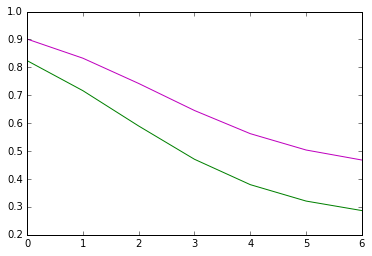

In [51]:
Ratio_Aph = Aph_LSST / Aph_SDSS
print "ratio=", Ratio_Aph

plt.figure()
plt.plot(range(0,7),Aph_SDSS, 'g' )
plt.hold(True)
plt.plot(range(0,7), Aph_LSST, 'm')
plt.show()

In [39]:
Denom_Bl_SDSS = np.asarray(  [ 21501.42962577,  11600.44045879,   6608.1447661,    4090.91988455,   2821.67994076,   2181.70134898,   1859.01011952])
Denom_Bl_LSST = np.asarray( [ 32422.81845317 , 17728.19458937 , 10318.84324239,   6582.88593638 ,  4699.1343988  ,  3749.30559599 ,  3270.38110056] )

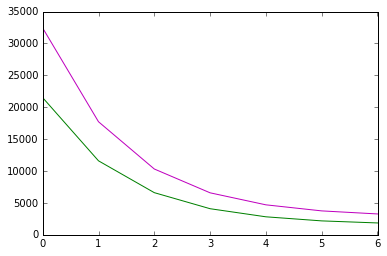

In [50]:
plt.figure()
plt.plot(range(0,7),Denom_Bl_SDSS, 'g' )
plt.hold(True)
plt.plot(range(0,7), Denom_Bl_LSST, 'm')
plt.show()

In [52]:
Ratio_denom_Bl = Denom_Bl_LSST / Denom_Bl_SDSS
print "ratio=", Ratio_denom_Bl

ratio= [ 1.5079378   1.52823461  1.56153408  1.60914565  1.66536762  1.71852376
  1.75920565]


In [41]:
# So the combined effect on the ratio of S/N quantities from these three things is:
print "combined ratio=", Ratio_of_interest_2 * Ratio_denom_Bl * Ratio_Aph

combined ratio= [ 3.30091647  3.46127076  3.66724549  3.87800551  4.04720644  4.1577802
  4.2208236 ]


Let's consider all of these together consistently:

In [42]:
gIA_LSST= np.asarray([  9.88145319e-06, 2.10381588e-05, 4.40255052e-05, 8.68461206e-05, 7.40816607e-05 , 3.29791510e-05, 2.89690248e-05])
gIA_SDSS=np.asarray([  2.94221099e-05 ,  5.53794328e-05 ,  1.17111798e-04 ,  2.11296901e-04  , 1.67906006e-04  , 8.06624181e-05 ,  5.35593408e-05])

In [43]:
cza_SDSS = 1.068; czb_SDSS = 1.070; cza_LSST = 1.023; czb_LSST = 1.016

Cov_Bl_LSST = (cza_LSST**2 * SigA_LSST**2 / neff_a_LSST + czb_LSST**2 * SigB_LSST**2/ neff_b_LSST) / Denom_Bl_LSST**2
Cov_Bl_SDSS = (cza_SDSS**2 * SigA_SDSS**2 / neff_a_SDSS + czb_SDSS**2*SigB_SDSS**2/ neff_b_SDSS) / Denom_Bl_SDSS**2

Cov_us_SDSS = 1. / (neff_us_SDSS * Aph_SDSS**2)
Cov_us_LSST = 1. / (neff_us_LSST * Aph_LSST**2)

In [45]:
print "Cov Bl LSST=", Cov_Bl_LSST
print "Cov_Bl_SDSS=", Cov_Bl_SDSS

print "Cov_us_LSST=", Cov_us_LSST
print "Cov_us_SDSS=", Cov_us_SDSS

Cov Bl LSST= [  0.19789194   0.66191256   1.9537438    4.80061617   9.42093291
  14.79884985  19.45059608]
Cov_Bl_SDSS= [   0.86475341    2.97083135    9.15520049   23.88828698   50.21245496
   83.99169709  115.68137687]
Cov_us_LSST= [ 0.71521342  0.83788187  1.05474479  1.39525007  1.83743317  2.28939256
  2.65421151]
Cov_us_SDSS= [  12.91164004   17.08220116   25.20229676   39.5885359    60.82082825
   85.16560421  106.62842267]


In [44]:
print "full ratio=", np.sqrt(np.dot(gIA_LSST, np.dot(np.diag(Cov_Bl_LSST), gIA_LSST))/ np.dot(gIA_LSST, np.dot(np.diag(Cov_us_LSST), gIA_LSST))* np.dot(gIA_SDSS, np.dot(np.diag(Cov_us_SDSS), gIA_SDSS)) / np.dot(gIA_SDSS, np.dot(np.diag(Cov_Bl_SDSS), gIA_SDSS)))

full ratio= 2.46599284845


In [54]:
print "full ratio=", np.sqrt(Cov_Bl_LSST ) / np.sqrt(Cov_us_LSST) * np.sqrt(Cov_us_SDSS) / np.sqrt(Cov_us_SDSS)

full ratio= [ 0.5260127   0.88880997  1.36100623  1.85490839  2.26433761  2.54245836
  2.70706506]
